# Gradient_tape_linear_regression/raw-tf

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
x = tf.constant([[5, 0], [1, 3]])
print(x)

tf.Tensor(
[[5 0]
 [1 3]], shape=(2, 2), dtype=int32)


In [ ]:
# অন্যভাবে দেখি
x.numpy()

In [4]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
print(tape.gradient(y, x).numpy())

6.0


In [5]:
dense1 = tf.keras.layers.Dense(32)
dense2 = tf.keras.layers.Dense(32)

with tf.GradientTape() as tape:
  result = dense2(dense1(tf.zeros([1, 10])))
  tape.gradient(result, dense1.variables)

In [6]:
def make_noisy_data(m=0.1, b=0.3, n=100):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(x),), stddev=0.01)
  y = m * x + b + noise
  return x, y

In [7]:
x_train, y_train = make_noisy_data()

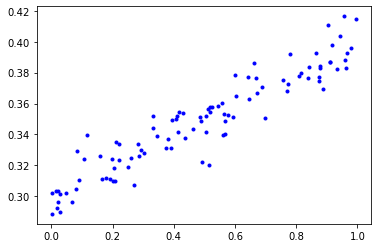

In [8]:
plt.plot(x_train, y_train, 'b.')

In [9]:
# initialize

m = tf.Variable(0.)
b = tf.Variable(0.)

In [10]:
def predict(x):
  y = m * x + b
  return y

In [11]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

In [12]:
loss = squared_error(predict(x_train), y_train)
print("Starting loss", loss.numpy())

Starting loss 0.12243931


In [13]:
learning_rate = 0.05
steps = 200

for i in range(steps):
  
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
    
  gradients = tape.gradient(loss, [m, b])
  
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)
  
  if i % 20 == 0:    
    print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.122439
Step 20, Loss 0.000823
Step 40, Loss 0.000222
Step 60, Loss 0.000193
Step 80, Loss 0.000173
Step 100, Loss 0.000158
Step 120, Loss 0.000147
Step 140, Loss 0.000138
Step 160, Loss 0.000132
Step 180, Loss 0.000127


In [14]:
print ("m: %f, b: %f" % (m.numpy(), b.numpy()))

m: 0.110189, b: 0.294307


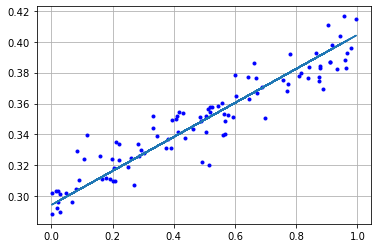

In [15]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_train, predict(x_train))
plt.grid('off')

## এরর সারফেস 

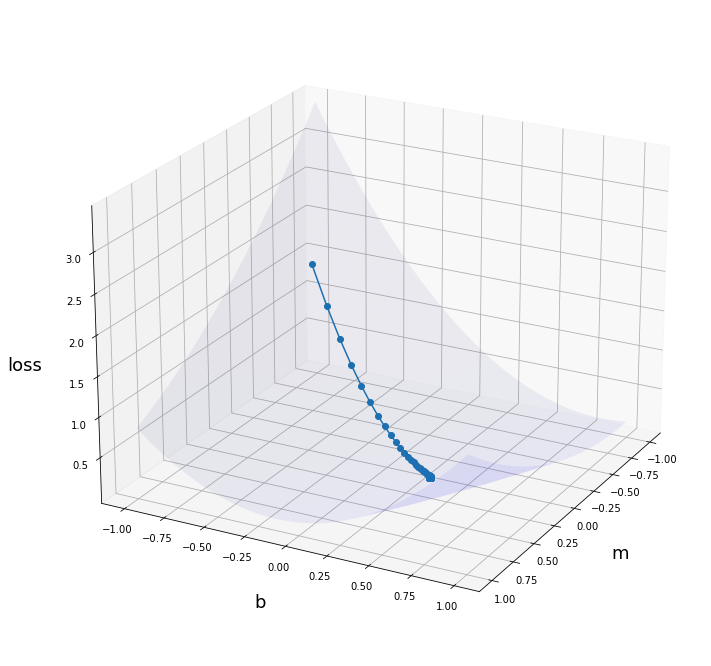

In [16]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


ms = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
m_mesh, b_mesh = np.meshgrid(ms, bs)

def loss_for_values(m, b):
  y = m * x_train + b
  loss = squared_error(y, y_train)
  return loss

zs = np.array([loss_for_values(m, b) for (m,b) in zip(np.ravel(m_mesh), 
                                                      np.ravel(b_mesh))])
z_mesh = zs.reshape(m_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_mesh, b_mesh, z_mesh, color='b', alpha=0.06)


m = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
  with tf.GradientTape() as tape:
    predictions = predict(x_train)
    loss = squared_error(predictions, y_train)
  gradients = tape.gradient(loss, [m, b])
  history.append((m.numpy(), b.numpy(), loss.numpy()))
  m.assign_sub(gradients[0] * learning_rate)
  b.assign_sub(gradients[1] * learning_rate)

# ট্রাজেকটরি প্লট করি
ax.plot([h[0] for h in history], 
        [h[1] for h in history], 
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('m', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=28)